In [209]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [183]:
class Model(nn.Module):
    def __init__(self,in_features, out_features):
        super().__init__()
        self.linear=nn.Linear(in_features,out_features)
        
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [184]:
torch.manual_seed(59)
model=Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [185]:
x=torch.tensor([2.0])
model.forward(x)

tensor([1.1758], grad_fn=<ViewBackward0>)

In [186]:
X=torch.linspace(1,50.,50).reshape(-1,1)

In [187]:
torch.manual_seed(71)
e=torch.randint(-8,9,(50,1),dtype=float)

In [188]:
y=2*X+1+e

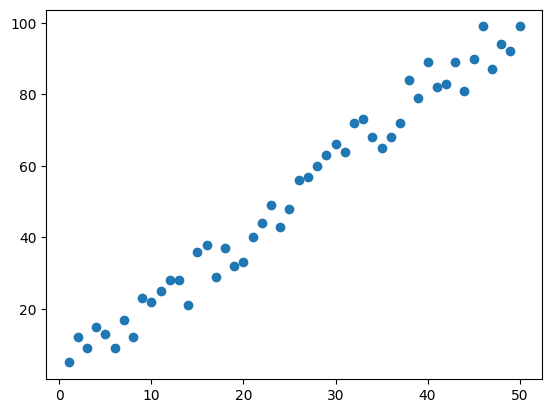

In [189]:
plt.scatter(X.numpy(),y.numpy())

In [190]:
# Plotting graph for random values of x1 and the weights and bias of our linear model defined previously.

In [191]:
x1=np.linspace(0,50.,50)   # Remember only arrays are plotted through plt. If its tensor it has to be converted to numpy beforehand.
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [192]:
w=0.1060
b=0.9638
y1=w*x1+b

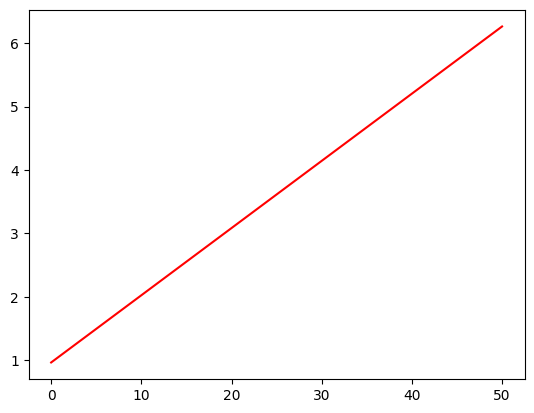

In [193]:
plt.plot(x1,y1,'r')

In [194]:
# Now super imposing other values stored in X onto the above graph

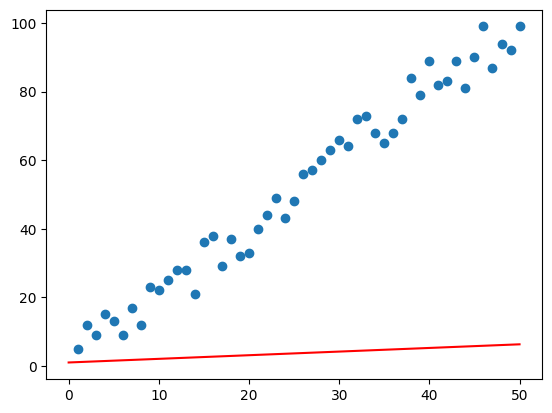

In [195]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')

In [196]:
# We see above that with the current weight and bias, the model is performing poorly (red line should overlap dotted).
# So, now we have to train our model.

In [197]:
criterion = nn.MSELoss()

In [198]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [199]:
# model.float()

# # Cast your input data to type Float
# X = X.float()
y = y.float()

epochs=50
losses=[]

for i in range(epochs):
    y_pred = model.forward(X)

    loss = criterion(y_pred,y)

    losses.append(loss)

    print(f'epoch: {i}  loss: {loss.item()}  weight: {model.linear.weight.item()}  bias: {model.linear.bias.item()}') 

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

epoch: 0  loss: 3057.216796875  weight: 0.10597813129425049  bias: 0.9637961387634277
epoch: 1  loss: 1588.5306396484375  weight: 3.334900140762329  bias: 1.0604636669158936
epoch: 2  loss: 830.2999267578125  weight: 1.014832854270935  bias: 0.9922628402709961
epoch: 3  loss: 438.8521728515625  weight: 2.6817994117736816  bias: 1.0425218343734741
epoch: 4  loss: 236.76144409179688  weight: 1.4840213060379028  bias: 1.0076650381088257
epoch: 5  loss: 132.4291229248047  weight: 2.3446059226989746  bias: 1.0339646339416504
epoch: 6  loss: 78.56572723388672  weight: 1.7262253761291504  bias: 1.0163217782974243
epoch: 7  loss: 50.75775909423828  weight: 2.170504093170166  bias: 1.0302516222000122
epoch: 8  loss: 36.4012336730957  weight: 1.8512457609176636  bias: 1.0214954614639282
epoch: 9  loss: 28.989229202270508  weight: 2.0806007385253906  bias: 1.029038906097412
epoch: 10  loss: 25.162382125854492  weight: 1.9157683849334717  bias: 1.0248701572418213
epoch: 11  loss: 23.18647384643554

In [200]:
# As mentioned previously, the weights and bias should be near to 2 and 1 respectively. 
# There is slight variation because of e (error) in the equation.

Text(0.5, 0, 'Epochs')

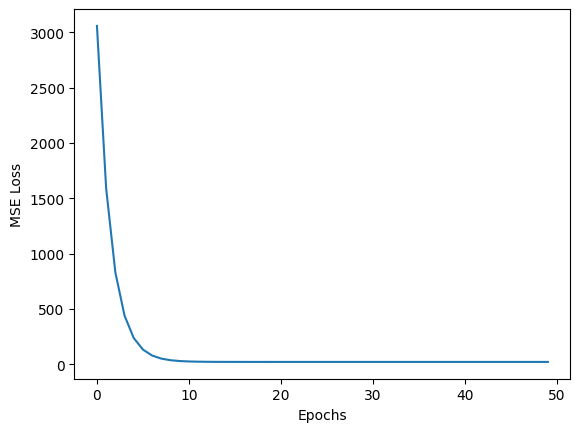

In [225]:
losses_numpy = [loss.item() for loss in losses]
plt.plot(range(epochs),losses_numpy)
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')

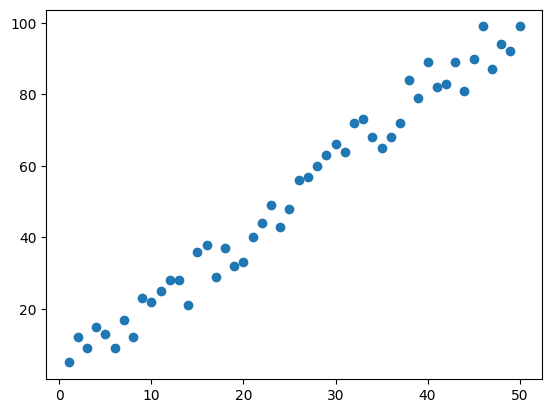

In [224]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(

In [228]:
x1=np.linspace(0,50.,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

y1= current_weight*x1+current_bias

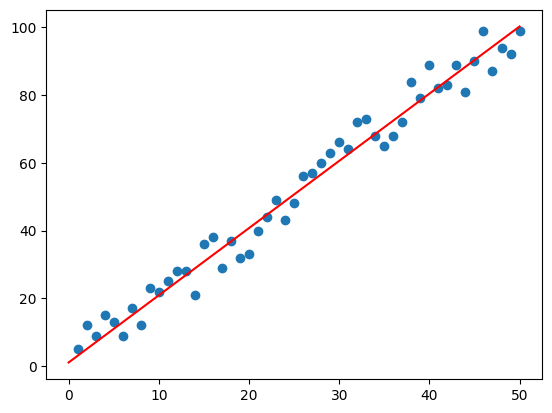

In [230]:
plt.plot(x1,y1,'r')
plt.scatter(X.numpy(),y.numpy())

In [ ]:
# We see that with the learned weights and bias, it is better able to predict.